In [7]:
%pip install matplotlib seaborn pyarrow fastparquet

  Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp314-cp314-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp314-cp314-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
Using cached matplotlib-3.10.8-cp314-cp314-win_amd64.whl (8.3 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/673.3 kB ? eta -:--:--
   ------------------------------ -------- 524.3/673.3 kB 10.2 MB/s eta 0:00:01
   ---------------------------------------- 673.3/673.3 kB 7.1 MB/s  0:00:00
Using cached contourpy-1.3.3-cp314-cp314-win_amd64.whl (232 kB)
   --------------

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_users = pd.read_parquet('02-silver-validated/users.parquet')
df_cep = pd.read_parquet('02-silver-validated/cep_info.parquet')

df = pd.merge(df_users, df_cep, on='cep', how='left')

In [15]:
df['data_nascimento'] = pd.to_datetime(df['data_nascimento'])
df['ano_nascimento'] = df['data_nascimento'].dt.year
df['genero'] = df['genero'].str.strip().str.upper()

Text(0, 0.5, 'Quantidade')

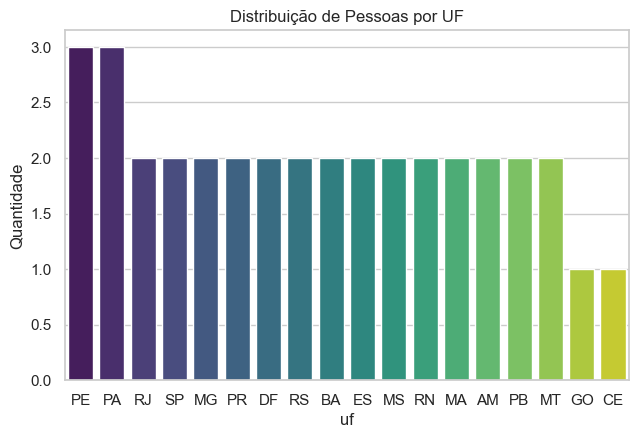

In [12]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
dist_uf = df['uf'].value_counts().sort_values(ascending=False)
sns.barplot(x=dist_uf.index, y=dist_uf.values, hue=dist_uf.index, palette='viridis', legend=False)
plt.title('Distribuição de Pessoas por UF')
plt.ylabel('Quantidade')

Text(0.5, 0, 'Ano')

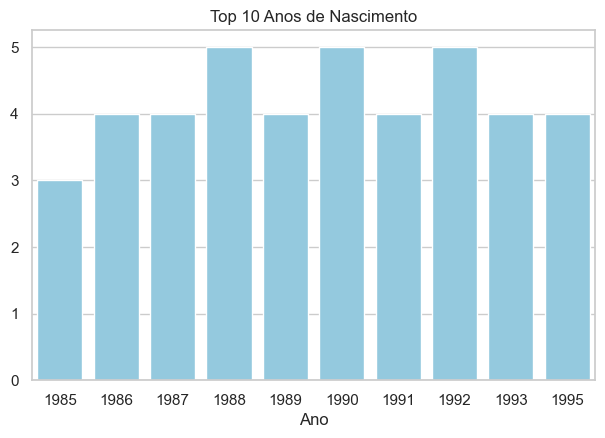

In [13]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 2)
top_10_anos = df['ano_nascimento'].value_counts().head(10).sort_index()
sns.barplot(x=top_10_anos.index.astype(int), y=top_10_anos.values, color='skyblue')
plt.title('Top 10 Anos de Nascimento')
plt.xlabel('Ano')

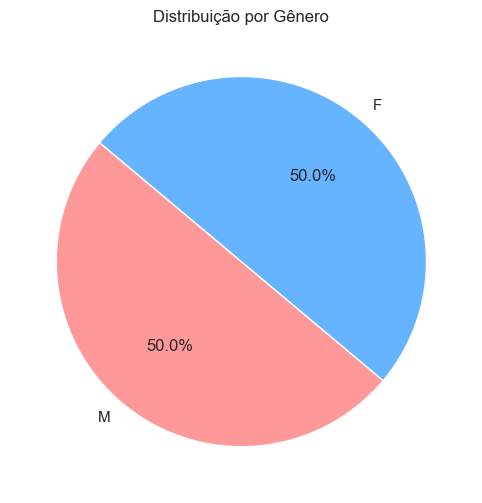

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 2)
dist_genero = df['genero'].value_counts()
plt.pie(dist_genero, labels=dist_genero.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribuição por Gênero')

plt.tight_layout()
plt.show()